In [1]:
# !/usr/bin/env python3.9
# -*- coding: utf-8 -*- 
#----------------------------------------------------------------------------
# Created By  : Sergey Krasnitskii   
# Created Date: 03/11/2022 17:55
# version ='1.0'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
sns.set()

"""
Main goal

3) На основе итогового файла из п.1 написать скрипт, решающий задачу бинарной классификации. X1 и x2 – фичи, y – ответы.
        
        a. Разделить выборку на тестовую и тренировочную
        
        b. Вывести оценку погрешности работы метода
"""

In [2]:
data = pd.read_csv('data_merged.csv')
data_x = data[['x1', 'x2']]
data_y = data['y']

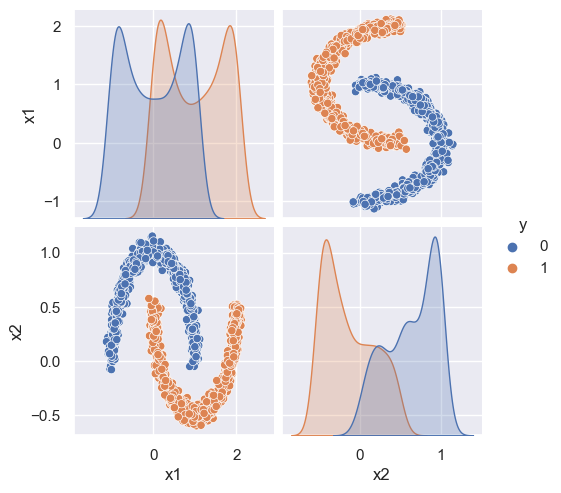

In [3]:
sns.pairplot(data, hue="y");

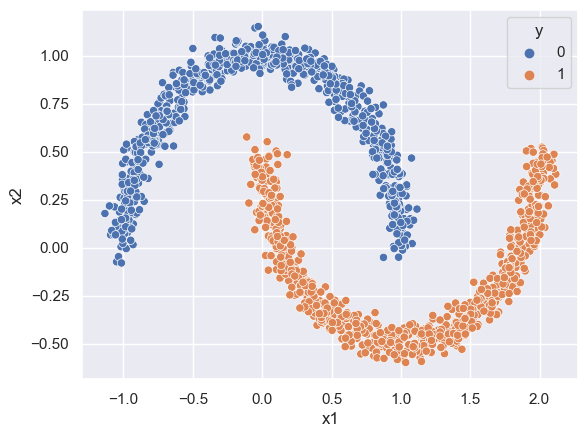

In [4]:
sns.scatterplot(data=data, x='x1', y='x2', hue='y');

In [5]:
print(f'Data shape: {data.shape}')
print(f'Data_x shape: {data_x.shape}')
print(f'Data_y shape: {data_y.shape}')

Data shape: (1499, 3)
Data_x shape: (1499, 2)
Data_y shape: (1499,)


In [6]:
# Some info 
data.info(); # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 
data.describe(); # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 
data.nunique(); # количество уникальных значений для каждого столбца 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1499 non-null   float64
 1   x2      1499 non-null   float64
 2   y       1499 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [7]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(data[column].value_counts(dropna=False)) 

x1
 0.577020    1
 0.455945    1
-0.025104    1
-0.252399    1
-0.325631    1
            ..
 1.641508    1
 0.316344    1
-0.995497    1
 0.976032    1
-0.670082    1
Name: x1, Length: 1499, dtype: int64
x2
-0.401648    1
-0.204944    1
 0.996839    1
 0.953562    1
 0.900178    1
            ..
-0.260226    1
-0.188949    1
 0.257894    1
-0.443989    1
 0.796037    1
Name: x2, Length: 1499, dtype: int64
y
1    750
0    749
Name: y, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=42)

In [9]:
model_LinReg = LinearRegression().fit(X_train, y_train)
print(model_LinReg.score(X_test, y_test))

0.6891520580898628


In [10]:
def FinderBestModel(X_train, X_test, y_train, y_test):
    """
    Будем использовать следующие модели:
        LinearRegression
        LogisticRegression
        GaussianNB
        SVM
        RandomForestClassifier
        RandomForestRegressor
        KNeighborsRegressor
        KNeighborsClassifier
    Такого пула моделей хватит для выбора наилучшей.
    На вход функции: X_train, X_test, y_train, y_test
    return: best_model, score
    """
    # Fit some models
    model_LinReg = LinearRegression().fit(X_train, y_train)
    model_LogReg = LogisticRegression().fit(X_train, y_train)
    model_Gaus = GaussianNB().fit(X_train, y_train)
    model_SVM = SVC().fit(X_train, y_train)
    model_RandForReg = RandomForestRegressor().fit(X_train, y_train)
    model_RandForClass = RandomForestClassifier().fit(X_train, y_train)
    model_KNNReg = KNeighborsRegressor().fit(X_train, y_train)
    model_KNNClass = KNeighborsClassifier().fit(X_train, y_train)
    
    # Some models and scores
    model_LinReg_sc =  model_LinReg.score(X_test, y_test)
    model_LogReg_sc = model_LogReg.score(X_test, y_test)
    model_Gaus_sc = model_Gaus.score(X_test, y_test)
    model_SVM_sc = model_SVM.score(X_test, y_test)
    model_RandForReg_sc = model_RandForReg.score(X_test, y_test)
    model_RandForClass_sc = model_RandForClass.score(X_test, y_test)
    model_KNNReg_sc = model_KNNReg.score(X_test, y_test)
    model_KNNClass_sc = model_KNNClass.score(X_test, y_test)
    
    # Some models and their predictions 
    model_LinReg_accuracy = metrics.accuracy_score(y_train, np.round(abs(model_LinReg.predict(X_train))))
    model_LogReg_accuracy = metrics.accuracy_score(y_train, model_LogReg.predict(X_train))
    model_Gaus_accuracy = metrics.accuracy_score(y_train, model_Gaus.predict(X_train))
    model_SVM_accuracy = metrics.accuracy_score(y_train, model_SVM.predict(X_train))
    model_RandForReg_accuracy = metrics.accuracy_score(y_train, np.round(abs(model_RandForReg.predict(X_train))))
    model_RandForClass_accuracy = metrics.accuracy_score(y_train, model_RandForClass.predict(X_train))
    model_KNNReg_accuracy = metrics.accuracy_score(y_train, model_KNNReg.predict(X_train))
    model_KNNClass_accuracy = metrics.accuracy_score(y_train, model_KNNClass.predict(X_train))
    

    # Results
    results = [[], [], []]
    
    results[0].append('model_LinReg')
    results[0].append('model_LogReg')
    results[0].append('model_Gaus')
    results[0].append('model_SVM')
    results[0].append('model_RandForReg')
    results[0].append('model_RandForClass')
    results[0].append('model_KNNReg')
    results[0].append('model_KNNClass')
    
    results[1].append(model_LinReg_sc)
    results[1].append(model_LogReg_sc)
    results[1].append(model_Gaus_sc)
    results[1].append(model_SVM_sc)
    results[1].append(model_RandForReg_sc)
    results[1].append(model_RandForClass_sc)
    results[1].append(model_KNNReg_sc)
    results[1].append(model_KNNClass_sc)
    
    results[2].append(model_LinReg_accuracy)
    results[2].append(model_LogReg_accuracy)
    results[2].append(model_Gaus_accuracy)
    results[2].append(model_SVM_accuracy)
    results[2].append(model_RandForReg_accuracy)
    results[2].append(model_RandForClass_accuracy)
    results[2].append(model_KNNReg_accuracy)
    results[2].append(model_KNNClass_accuracy)
    
    final_results = []
    for i in range(len(results[0])):
        final_results.append(['Model:', results[0][i],
                              'Score:', results[1][i],
                              'Accuracy:', results[1][i]])
    return final_results

In [11]:
FinderBestModel(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

[['Model:',
  'model_LinReg',
  'Score:',
  0.6891520580898628,
  'Accuracy:',
  0.6891520580898628],
 ['Model:', 'model_LogReg', 'Score:', 0.89, 'Accuracy:', 0.89],
 ['Model:', 'model_Gaus', 'Score:', 0.89, 'Accuracy:', 0.89],
 ['Model:', 'model_SVM', 'Score:', 1.0, 'Accuracy:', 1.0],
 ['Model:',
  'model_RandForReg',
  'Score:',
  0.990918552036199,
  'Accuracy:',
  0.990918552036199],
 ['Model:', 'model_RandForClass', 'Score:', 1.0, 'Accuracy:', 1.0],
 ['Model:', 'model_KNNReg', 'Score:', 1.0, 'Accuracy:', 1.0],
 ['Model:', 'model_KNNClass', 'Score:', 1.0, 'Accuracy:', 1.0]]

Можно пронаблюдать как различные модели машинного обучения справились с заданием.
Модели линейной регресси показали самый маленький результат,
логистическая регрессия и нфивный байесовский классификтор показали результат в 0.89, это как бы неплохо
но мало. Модель RandomForestRegressor показала справедливый высокий результат близкий к 1.
Остальные модели показали результат в 1, но можно ли им верить...

# Выведем confusion_matrix для примера одной из тех моделей которые показали 1.

In [12]:
# LinearSVC - классические бинарный классификатор который мы возьмем в пример

from sklearn.svm import LinearSVC
model_linearSVC= LinearSVC(C=0.01,random_state=42).fit(X_train, y_train)

y_true = y_test
y_pred = model_linearSVC.predict(X_test) 
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel() 

error_rate = 1 - metrics.accuracy_score(y_train, model_linearSVC.predict(X_train))
print(f'Доля ошибочных классификаций: {error_rate}')

Доля ошибочных классификаций: 0.12677231025854874


In [13]:
print(f'True negative: {tn}')
print(f'False positive: {fp}')
print(f'False negative: {fn}')
print(f'True positive: {tp}')

True negative: 116
False positive: 14
False negative: 19
True positive: 151


In [14]:
model_SVM_presition = (tp) / (tp + fp)

In [15]:
model_SVM_recall = (tp) / (tp + fn)

In [16]:
print(f'Точность (presition): {model_SVM_presition}')
print(f'Полнота (recall): {model_SVM_recall}')

Точность (presition): 0.9151515151515152
Полнота (recall): 0.888235294117647


In [17]:
f1_ = (tp) / (tp + ((fp + fn)/2))

In [18]:
print(f'F1-мера (presition & recall в одном числе): {f1_}')

F1-мера (presition & recall в одном числе): 0.9014925373134328


# Оценим вероятность классификации: вероятности классов

TPR (true positive rate) – это полнота, доля положительных объектов, правильно предсказанных положительными:

In [19]:
TPR = tp / (tp + fn)
print(f'TPR: {TPR}')

TPR: 0.888235294117647


FPR (false positive rate) – это доля отрицательных объектов, неправильно предсказанных положительными:

In [20]:
FPR = fp / (fp + tn)
print(f'FPR: {FPR}')

FPR: 0.1076923076923077


# MSE,  RMSE,  MAE, MAPE, R2

In [21]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_true, y_pred)
print('Реузльтат вычисления функции потерь')
print(f'MSE: {MSE}')
print('будет выигрывать та модель, у которой меньше ошибка на объектах-выбросах')

Реузльтат вычисления функции потерь
MSE: 0.11
будет выигрывать та модель, у которой меньше ошибка на объектах-выбросах


In [22]:
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
print('Реузльтат вычисления корня квадратного от функций потерь')
print(f'RMSE: {RMSE}')

Реузльтат вычисления корня квадратного от функций потерь
RMSE: 0.33166247903553997


In [23]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true, y_pred)
print('Использовать RMSE для сравнения моделей на выборках с большим количеством выбросов может быть неудобно.',
      'В таких случаях прибегают к также знакомой в качестве функции потери метрике MAE (mean absolute error):')
print(f'MAE: {MAE}')

Использовать RMSE для сравнения моделей на выборках с большим количеством выбросов может быть неудобно. В таких случаях прибегают к также знакомой в качестве функции потери метрике MAE (mean absolute error):
MAE: 0.11


In [24]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE = mean_absolute_percentage_error(y_true, y_pred)
print('Если рассматривать не абсолютную, а относительную ошибку на объектах.')
print(f'MAPE: {MAPE}')

Если рассматривать не абсолютную, а относительную ошибку на объектах.
MAPE: 210167982610623.2


In [25]:
from sklearn.metrics import r2_score as r2

R_2 = r2(y_true, y_pred)
print('У идеального решающего правила R2 равен 1,',
      'у наилучшего константного предсказания он равен 0 на обучающей выборке.',
      'Можно заметить, что R2 показывает, какая доля дисперсии таргетов (знаменатель) объяснена моделью.')
print(f'R_2: {R_2}')

У идеального решающего правила R2 равен 1, у наилучшего константного предсказания он равен 0 на обучающей выборке. Можно заметить, что R2 показывает, какая доля дисперсии таргетов (знаменатель) объяснена моделью.
R_2: 0.5520361990950227


При желании, можно выбрать ту модель которая нам понравится больше всего и использовать функционал 
библиотеки xgboost. Она исользует бустинг для моделей, что дает им большую эфективность в отличии от классического способа использования моделей. Кроме того, если меется более интересный датасет, можно использовать различные стандартизаторы, методы понижений размерности, крос валидации и алгоритм Боруты и многи другие способы предподготовки данных.